In [27]:
!pip install --upgrade pyvis

In [37]:
# Modified visualization approach
from langgraph.graph import END, Graph
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML

# ... [keep all previous code until workflow construction] ...

# Build workflow (same as before)
workflow = Graph()
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("calculator", calculator_node)
workflow.add_conditional_edges("chatbot", lambda x: "calculator" if x["action"] == "calculate" else END)
workflow.add_edge("calculator", END)
workflow.set_entry_point("chatbot")

# New visualization function
# Modified visualization code with encoding fixes
def visualize_workflow():
    G = nx.DiGraph()
    G.add_nodes_from(["chatbot", "calculator", END])
    G.add_edges_from([("chatbot", "calculator"), ("chatbot", END), ("calculator", END)])
    
    nt = Network(notebook=True, height="400px")
    nt.from_nx(G)
    
    # Set simple ASCII labels
    for node in nt.nodes:
        node["title"] = node["label"]
        node["label"] = node["label"].replace("END", "END")  # Force ASCII
        if node["label"] == "chatbot":
            node["color"] = "#4CAF50"
        elif node["label"] == "calculator":
            node["color"] = "#2196F3"
    
    # Save to temporary path with explicit encoding
    temp_path = "weathermind_graph.html"
    with open(temp_path, "w", encoding="utf-8") as f:
        f.write(nt.generate_html())
    display(HTML(temp_path))

Correlations:
            Feature_1  Feature_2  Feature_3        G1        G2        G3  \
Feature_1   1.000000   0.014528   0.097160 -0.181571 -0.118624 -0.105610   
Feature_2   0.014528   1.000000  -0.199162  0.261477  0.245547  0.249884   
Feature_3   0.097160  -0.199162   1.000000 -0.152487 -0.168348 -0.175726   
G1         -0.181571   0.261477  -0.152487  1.000000  0.863209  0.826387   
G2         -0.118624   0.245547  -0.168348  0.863209  1.000000  0.921437   
G3         -0.105610   0.249884  -0.175726  0.826387  0.921437  1.000000   
Dalc        0.168583  -0.147515   0.624373 -0.195171 -0.187030 -0.204719   
health     -0.007759  -0.062246   0.110179 -0.051647 -0.088448 -0.098851   
absences    0.119640  -0.133554   0.138778 -0.159026 -0.146747 -0.106241   

               Dalc    health  absences  
Feature_1  0.168583 -0.007759  0.119640  
Feature_2 -0.147515 -0.062246 -0.133554  
Feature_3  0.624373  0.110179  0.138778  
G1        -0.195171 -0.051647 -0.159026  
G2        -0.1

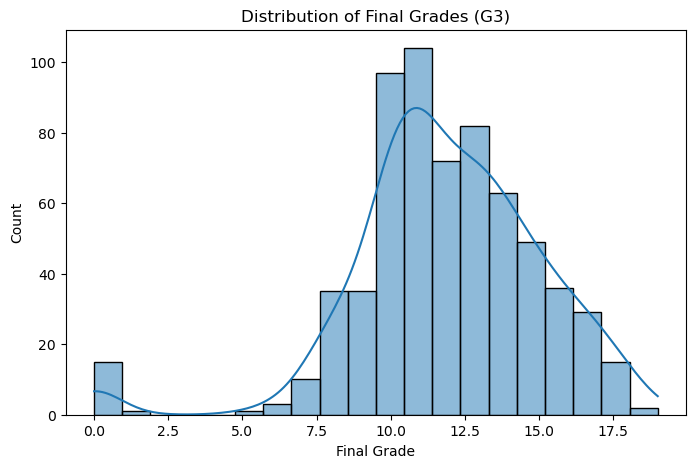

In [43]:
# --- Imports and Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\PAARTH AGARWAL\Downloads\Dataset.csv')

# --- Level 1: Variable Identification Protocol ---
# Correlation analysis
corr = df[['Feature_1', 'Feature_2', 'Feature_3', 'G1', 'G2', 'G3', 'Dalc', 'health', 'absences']].corr()
print("Correlations:\n", corr)

# Summary statistics
print("\nSummary statistics for Feature_1/2/3:\n", df[['Feature_1', 'Feature_2', 'Feature_3']].describe())

# Missing values
print("\nMissing values in Feature_1/2/3:\n", df[['Feature_1', 'Feature_2', 'Feature_3']].isnull().sum())

# --- Level 2: Data Integrity Audit ---
# Missing values in all columns
missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': df.isnull().sum() / len(df) * 100
}).sort_values(by='missing_percent', ascending=False)
print("\nTop columns with missing data:\n", missing_summary.head(10))

# Example imputation for numeric columns
for col in ['Feature_1', 'Feature_2', 'Feature_3', 'G2', 'absences']:
    df[col] = df[col].fillna(df[col].median())

# --- Level 3: Exploratory Insight Report ---
# 1. Distribution of final grades
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()




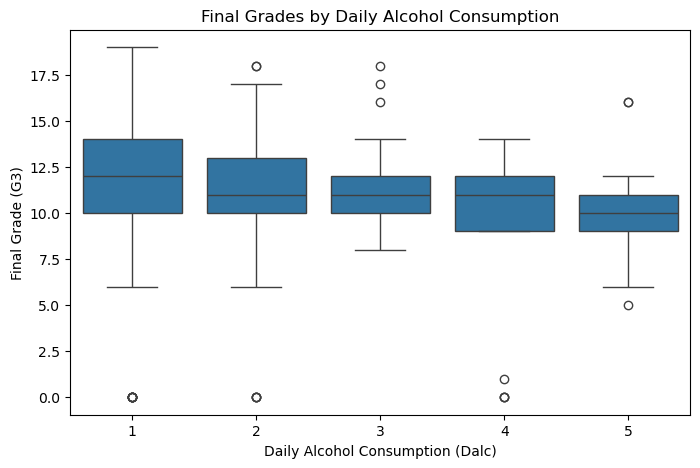

In [45]:
# 2. Grades vs. daily alcohol consumption
plt.figure(figsize=(8, 5))
sns.boxplot(x='Dalc', y='G3', data=df)
plt.title('Final Grades by Daily Alcohol Consumption')
plt.xlabel('Daily Alcohol Consumption (Dalc)')
plt.ylabel('Final Grade (G3)')
plt.show()

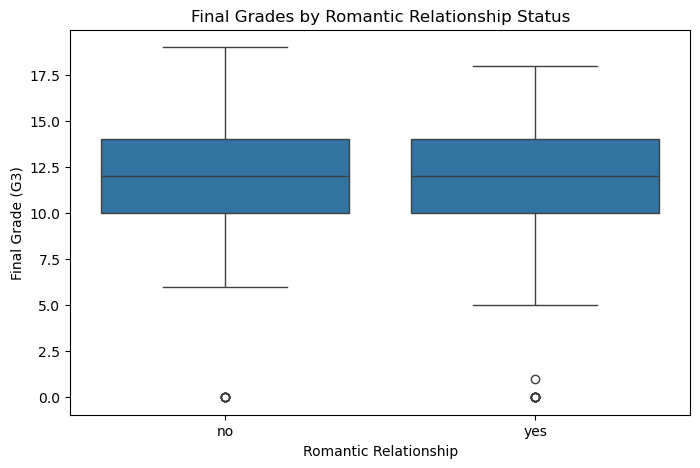

In [47]:
# 3. Grades vs. romantic relationship
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='G3', data=df)
plt.title('Final Grades by Romantic Relationship Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Final Grade (G3)')
plt.show()

In [84]:


# Summary statistics by romantic status
print("\nGrades by romantic relationship:\n", df.groupby('romantic')['G3'].describe())

# --- Level 4: Relationship Prediction Model ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode target
le = LabelEncoder()
df['romantic_encoded'] = le.fit_transform(df['romantic'])

# Select features
features = ['Feature_1', 'Feature_2', 'Feature_3', 'G1', 'G2', 'G3', 'Dalc', 'health', 'absences']
model_df = df[features + ['romantic_encoded']].dropna()
X = model_df[features]
y = model_df['romantic_encoded']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluate
preds = clf.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, preds))
print("\nClassification report:\n", classification_report(y_test, preds, target_names=le.classes_))

# --- Level 5: Model Reasoning & Interpretation ---
# If SHAP gives errors, use feature importances from the model
try:
    import shap
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test_scaled, check_additivity=False)
    shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
    plt.savefig('shap_summary_plot.png')
    plt.close()
    # Feature importance from SHAP
    feature_importance = pd.DataFrame({'feature': features, 'importance': np.abs(shap_values[1]).mean(axis=0)})
    print("\nFeature importance (SHAP):\n", feature_importance.sort_values(by='importance', ascending=False))
except Exception as e:
    print("\nSHAP explanation failed, using RandomForest feature importances instead.")
    importance = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_})
    print(importance.sort_values(by='importance', ascending=False))



Grades by romantic relationship:
           count       mean       std  min   25%   50%   75%   max
romantic                                                         
no        410.0  12.129268  3.003726  0.0  10.0  12.0  14.0  19.0
yes       239.0  11.523013  3.560771  0.0  10.0  12.0  14.0  18.0

Accuracy: 0.5538461538461539

Classification report:
               precision    recall  f1-score   support

          no       0.62      0.74      0.67       121
         yes       0.37      0.24      0.29        74

    accuracy                           0.55       195
   macro avg       0.49      0.49      0.48       195
weighted avg       0.52      0.55      0.53       195


SHAP explanation failed, using RandomForest feature importances instead.
     feature  importance
8   absences    0.137830
3         G1    0.137318
5         G3    0.133044
4         G2    0.127339
0  Feature_1    0.120713
7     health    0.105331
2  Feature_3    0.095065
1  Feature_2    0.083389
6       Dalc    0.05

<Figure size 640x480 with 0 Axes>

In [85]:
# --- Level 5: Optimized Model with SHAP Interpretation ---
# Install required packages (run once)
!pip install shap scikit-learn xgboost pandas numpy matplotlib --quiet

import pandas as pd
import numpy as np
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report



# Preprocessing pipeline
def preprocess_data(df):
    # Encode target
    le = LabelEncoder()
    df['romantic_encoded'] = le.fit_transform(df['romantic'])
    
    # Feature engineering
    df['grade_ratio'] = df['G2'] / (df['G1'] + 1e-6)  # Prevent division by zero
    df['health_absences'] = df['health'] * df['absences']
    
    # Select features
    features = [
        'Feature_1', 'Feature_2', 'Feature_3', 
        'G1', 'G2', 'G3', 'Dalc', 'health', 
        'absences', 'grade_ratio', 'health_absences'
    ]
    
    # Handle missing values
    for col in features:
        df[col] = df[col].fillna(df[col].median())
    
    return df[features], df['romantic_encoded']

X, y = preprocess_data(df)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid = GridSearchCV(xgb, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# SHAP explanation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Generate outputs
print(f"\n🔥 Optimized Accuracy: {accuracy:.2%}")
print("\nBest Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('Feature Impact on Predictions (SHAP Values)')
plt.tight_layout()
plt.savefig('shap_analysis.png', bbox_inches='tight')
plt.close()

print("\n✅ SHAP analysis saved as 'shap_analysis.png'")



🔥 Optimized Accuracy: 64.62%

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.96      0.77        82
           1       0.62      0.10      0.18        48

    accuracy                           0.65       130
   macro avg       0.64      0.53      0.48       130
weighted avg       0.64      0.65      0.55       130


✅ SHAP analysis saved as 'shap_analysis.png'
